In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps#float32

In [2]:
# Load spike data
spike_data = np.load('../data/data_smooth_W20L50k.npy')                      
spike_data_t = spike_data[:,0:1000]
print(np.shape(spike_data))

# short time span
t = np.shape(spike_data_t)[1]
n = np.shape(spike_data)[0]


(336, 10000)


In [3]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(spike_data_t)) #scaling the data
print(scaled_data.shape)


scalar = StandardScaler()
scaled_data_full = pd.DataFrame(scalar.fit_transform(spike_data)) #scaling the data
print(scaled_data_full.shape)

(336, 1000)
(336, 10000)


<AxesSubplot: >

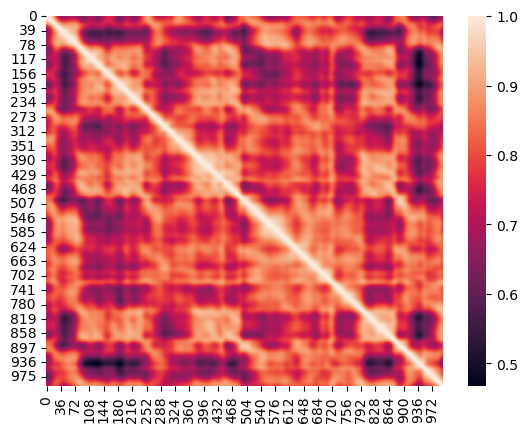

In [4]:
sns.heatmap(scaled_data.corr())

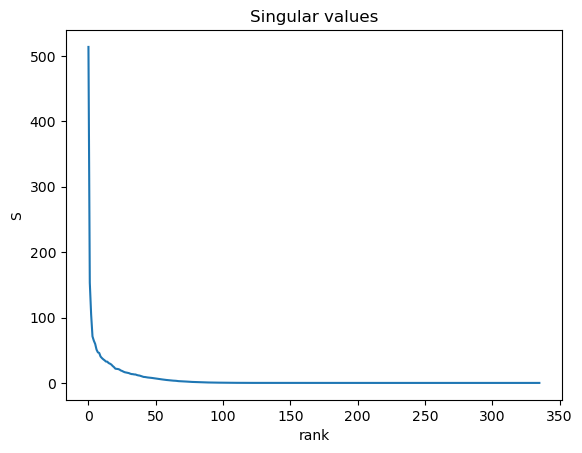

In [5]:
#Applying PCA

#Taking no. of Principal Components r
r = 336
pca = PCA(n_components = r)

#pca.fit(scaled_data)
#data_pca = pca.transform(scaled_data)

# X = USV'
data_pca = pca.fit_transform(scaled_data) # = US

explained_variance = pca.explained_variance_ratio_
#print(pca.explained_variance_ratio_)

c = pca.components_      # V
s = pca.singular_values_ # S
S = np.diag(s)

#print(S)
#print(np.linalg.inv(S))
#print(data_pca2 @ np.linalg.inv(S))
fig, ax = plt.subplots()
ax.plot(s)

ax.set(xlabel='rank', ylabel='S',
       title='Singular values')
plt.show()


In [6]:
# Project data into low dim space 
# X_proj = U'X
# X_proj = inv(S)S'U'X
spike__projected = np.linalg.inv(S)@data_pca.T@scaled_data
spike_projected = pd.DataFrame.to_numpy(spike__projected)

#full
spike__projectedf = np.linalg.inv(S)@data_pca.T@scaled_data_full
spike_projectedf = pd.DataFrame.to_numpy(spike__projectedf)

#print(spike_new_proj)

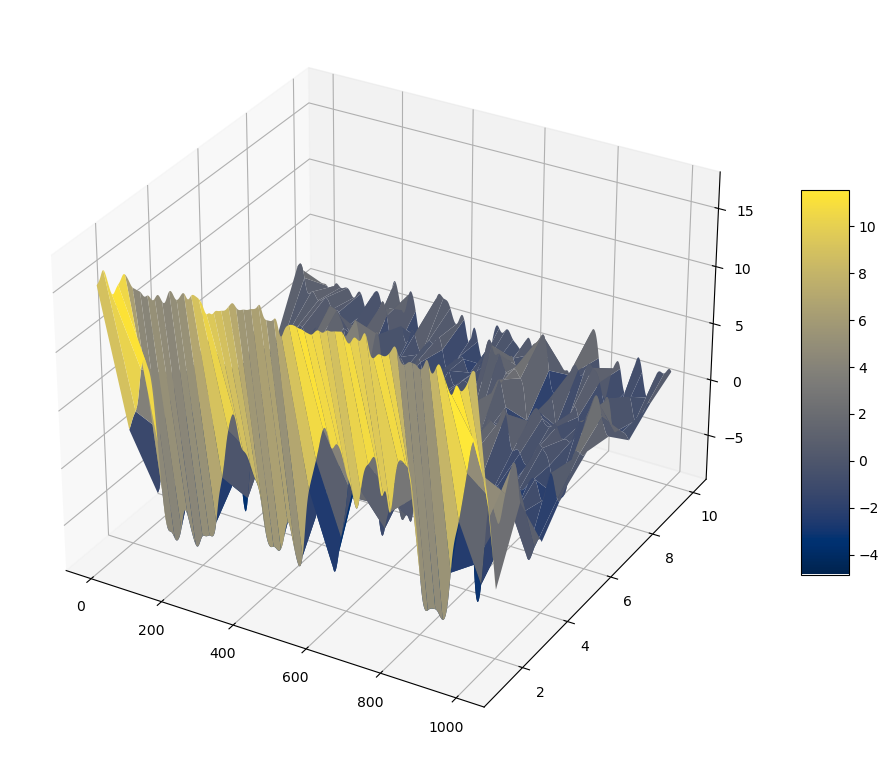

In [7]:
dims=10
time = np.linspace(1, t, t)
d = np.linspace(1, dims, dims)
T, N = np.meshgrid(time, d)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, spike_projected[0:dims,:], cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

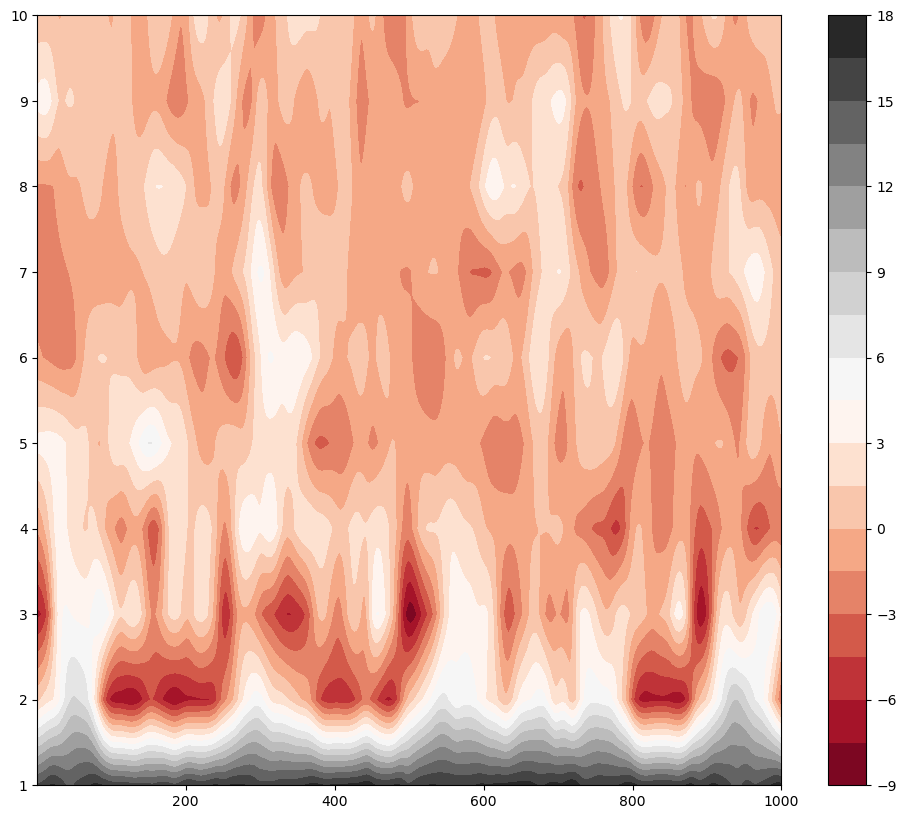

In [8]:
fig = plt.figure(figsize = (12,10))
plt.contourf(T, N, spike_projected[0:dims,:], 20, cmap='RdGy')
plt.colorbar();

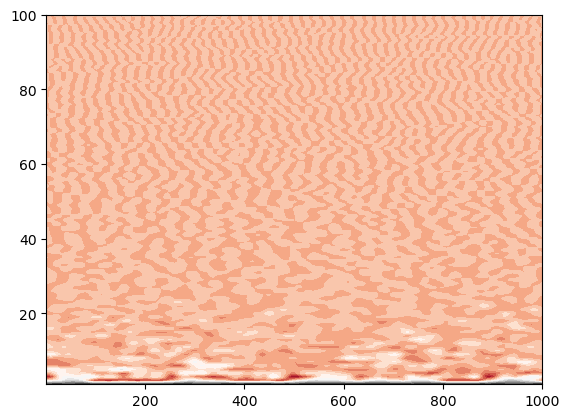

In [9]:
time = np.linspace(1, 1000,1000)
neurons = np.linspace(1, 100, 100)
#print(time.shape)
#print(time)
#print(neurons.shape)
#print(neurons)
T, N = np.meshgrid(time, neurons)


plt.contourf(T, N, spike_projected[0:100,:], 20, cmap='RdGy')

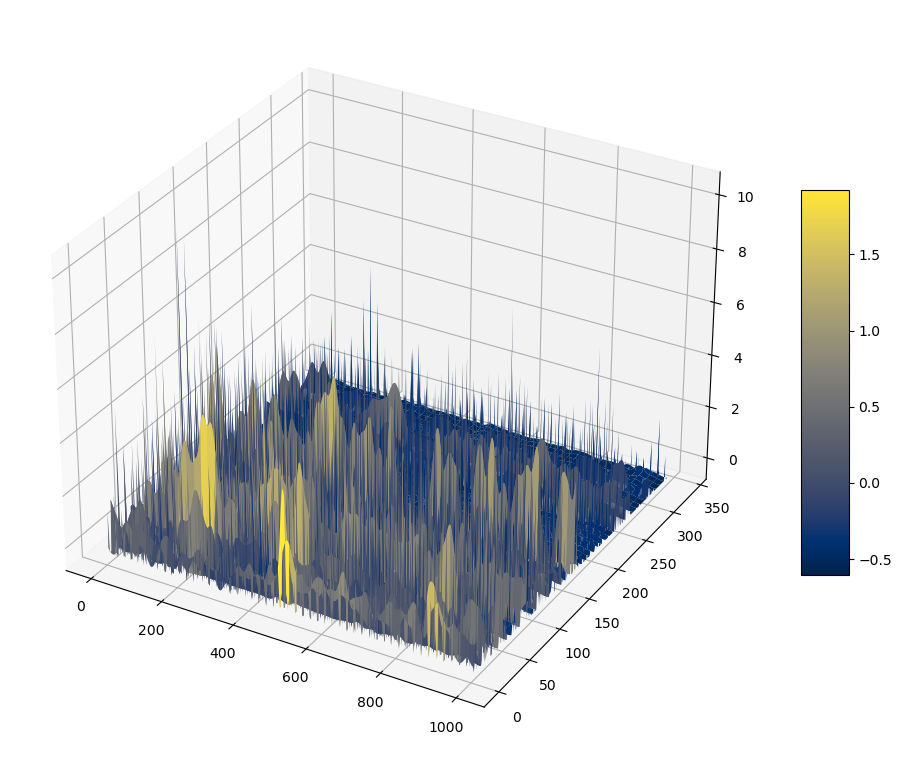

In [10]:
# orignal data scaled
scaled = pd.DataFrame.to_numpy(scaled_data)
time = np.linspace(1, 1000, 1000)
neurons = np.linspace(1, 336, 336)
T, N = np.meshgrid(time, neurons)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, scaled, cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

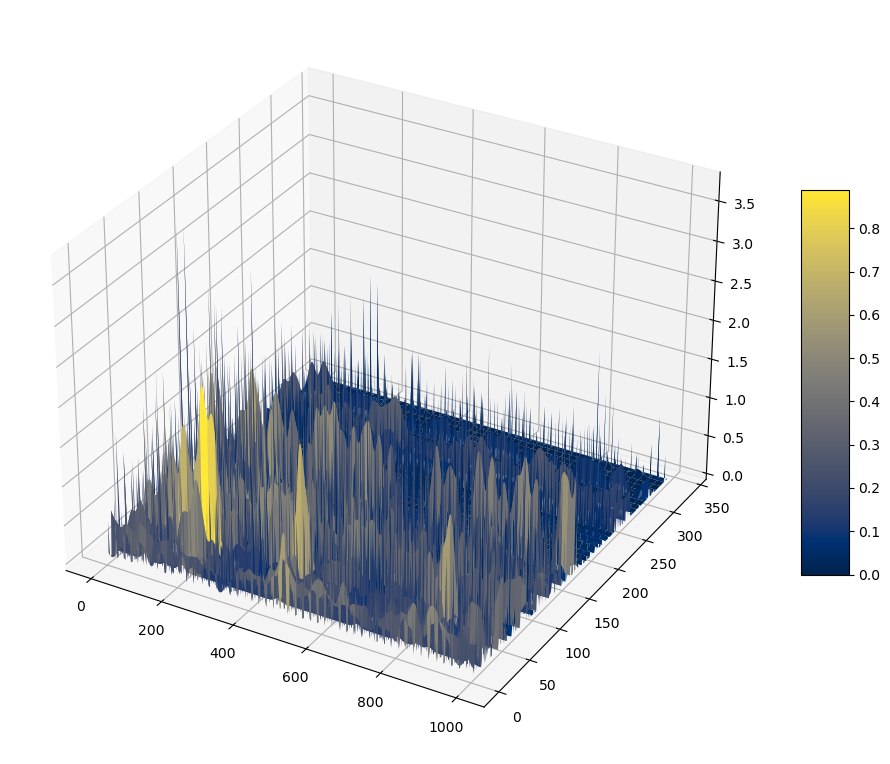

In [11]:
# original data not scaled
time = np.linspace(1, 1000, 1000)
neurons = np.linspace(1, 336, 336)
T, N = np.meshgrid(time, neurons)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, spike_data[:,0:1000], cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [12]:
# projected data
%matplotlib qt

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

time = np.linspace(1, 1000, 1000)
neurons = np.linspace(1, 336, 336)


T, N = np.meshgrid(time, neurons)
surf = ax.plot_surface(T, N, spike_projected, cmap = plt.cm.cividis)


fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [13]:
spike__projected = np.linalg.inv(S)@data_pca.T@scaled_data
spike_projected = pd.DataFrame.to_numpy(spike__projected)

rank = 20
data_pca_r = data_pca[:,0:rank]
S_r = np.diag(s[:rank])
spike__reconstructed = data_pca_r@np.linalg.inv(S_r)@np.linalg.inv(S_r)@data_pca_r.T@scaled_data
spike_reconstructed = pd.DataFrame.to_numpy(spike__reconstructed)
print(spike_reconstructed.shape)

(336, 1000)


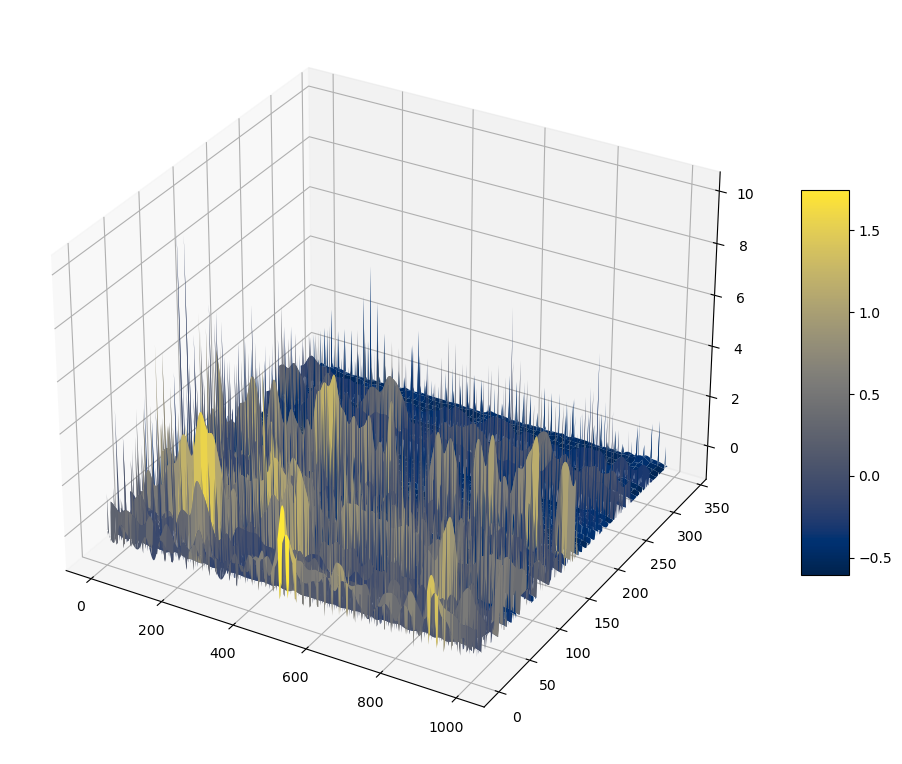

In [14]:
# reconstructed data
%matplotlib inline
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

time = np.linspace(1, 1000, 1000)
neurons = np.linspace(1, 336, 336)


T, N = np.meshgrid(time, neurons)
surf = ax.plot_surface(T, N, spike_reconstructed, cmap = plt.cm.cividis)


fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [15]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
from matplotlib import cm
%matplotlib qt
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('Original data')
time = np.linspace(1, 1000, 1000)
neurons = np.linspace(1, 336, 336)


T, N = np.meshgrid(time, neurons)
#surf = ax.plot_surface(T, N, spike_data[:,0:1000], cmap = plt.cm.cividis)
surf = ax.plot_surface(T, N, scaled[:,0:1000], cmap = plt.cm.cividis)

fig.colorbar(surf, shrink=0.5, aspect=8)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title('Reconstructed data')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
surf = ax.plot_surface(T, N, spike_reconstructed, cmap = plt.cm.cividis)
fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()


In [16]:
print(scaled_data)

          0         1         2         3         4         5         6    \
0   -0.144950 -0.171849 -0.197738 -0.222480 -0.245932 -0.267949 -0.288388   
1   -0.259031 -0.256198 -0.254480 -0.254042 -0.255033 -0.257581 -0.261777   
2    1.201414  1.263985  1.327646  1.391915  1.456226  1.519933  1.582316   
3   -0.457674 -0.459320 -0.461061 -0.462939 -0.465003 -0.467312 -0.469933   
4   -0.392707 -0.386169 -0.379164 -0.371812 -0.364272 -0.356748 -0.349482   
..        ...       ...       ...       ...       ...       ...       ...   
331 -0.457674 -0.459320 -0.461061 -0.462939 -0.465003 -0.467313 -0.469934   
332 -0.457669 -0.459312 -0.461049 -0.462920 -0.464974 -0.467268 -0.469864   
333 -0.457674 -0.459320 -0.461061 -0.462939 -0.465003 -0.467313 -0.469934   
334 -0.457674 -0.459320 -0.461061 -0.462939 -0.465003 -0.467313 -0.469934   
335 -0.457674 -0.459320 -0.461061 -0.462939 -0.465003 -0.467313 -0.469934   

          7         8         9    ...       990       991       992  \
0  

In [17]:
print(spike_data_t)

[[0.09094172 0.0833884  0.07621174 ... 0.13448169 0.12589258 0.11788665]
 [0.05776641 0.05892088 0.05978929 ... 0.09615289 0.10089208 0.1078739 ]
 [0.48247147 0.49989024 0.51769323 ... 0.09982478 0.08457707 0.07116228]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [18]:
# full data
scaledf = pd.DataFrame.to_numpy(scaled_data_full)

rank = 20
data_pca_r = data_pca[:,0:rank]
S_r = np.diag(s[:rank])
spike__reconstructedf = data_pca_r@np.linalg.inv(S_r)@np.linalg.inv(S_r)@data_pca_r.T@scaled_data_full
spike_reconstructedf = pd.DataFrame.to_numpy(spike__reconstructedf)
print(spike_reconstructedf.shape)


from mpl_toolkits.mplot3d.axes3d import get_test_data
from matplotlib import cm

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('Original data')
time = np.linspace(1, 10000, 10000)
neurons = np.linspace(1, 336, 336)


T, N = np.meshgrid(time, neurons)
#surf = ax.plot_surface(T, N, spike_data[:,0:1000], cmap = plt.cm.cividis)
surf = ax.plot_surface(T, N, scaledf, cmap = plt.cm.cividis)

fig.colorbar(surf, shrink=0.5, aspect=8)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title('Reconstructed data')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
surf = ax.plot_surface(T, N, spike_reconstructedf, cmap = plt.cm.cividis)
fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

(336, 10000)


In [20]:
#%matplotlib qt
dims=200
time = np.linspace(1, 1000, 1000)
neurons = np.linspace(1, dims, dims)
T, N = np.meshgrid(time, neurons)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, spike_projected[0:dims,:1000], cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()